In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


#### Correlation

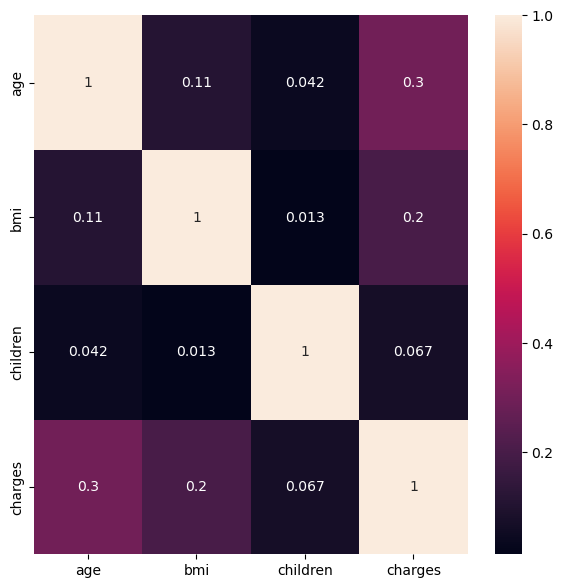

In [9]:
corr = df.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True)
plt.show()

#### Outliers Treatment

In [10]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.0000,18.00000,18.0000,18.00000,39.0000,62.0000,63.000000,64.000000,64.00000
bmi,15.9600,17.89420,19.2692,21.24800,30.4000,41.1080,43.920800,46.411200,53.13000
children,0.0000,0.00000,0.0000,0.00000,1.0000,3.0000,4.000000,5.000000,5.00000
charges,1121.8739,1252.95744,1621.7308,1767.49292,9386.1613,41210.0498,46677.324238,48537.796878,63770.42801


In [11]:
df[df['charges']>48537.796878].shape

(14, 7)

In [12]:
df['charges'] = np.where(df['charges']>48537.796878,48537.796878,df['charges'])

In [13]:
a = df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
age,18.0000,18.00000,18.0000,18.00000,39.0000,62.0000,63.000000,64.000000,64.000000
bmi,15.9600,17.89420,19.2692,21.24800,30.4000,41.1080,43.920800,46.411200,53.130000
children,0.0000,0.00000,0.0000,0.00000,1.0000,3.0000,4.000000,5.000000,5.000000
charges,1121.8739,1252.95744,1621.7308,1767.49292,9386.1613,41210.0498,46677.324238,48530.512736,48537.796878


#### Encoding Categorical features

In [14]:
for i in cat_cols:
    print(f'{i} | Unique Values {df[i].unique()}')

sex | Unique Values ['female' 'male']
smoker | Unique Values ['yes' 'no']
region | Unique Values ['southwest' 'southeast' 'northwest' 'northeast']


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [17]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [19]:
lb = LabelEncoder()
for i in ['sex','smoker']:
    df[i] = lb.fit_transform(df[i])

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [21]:
df_dum = pd.get_dummies(data=df,columns=['region'],drop_first=True)
print(df_dum.shape)
df_dum.columns

(1337, 9)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [22]:
x = df_dum.drop('charges',axis=1)
y = df_dum['charges']
print(x.shape)
print(y.shape)

(1337, 8)
(1337,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=35)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1002, 8)
(335, 8)
(1002,)
(335,)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [26]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2 =  r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2)
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))
    print('Test Score',model.score(x_test,y_test))

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

#### 1) Lin Reg

In [28]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
ypred_lr = lr.predict(x_test)
mscore(lr)
eval_model(y_test,ypred_lr)

Train Score 0.7563136226582448
Test Score 0.755616540469401
MAE 4171.549985583259
MSE 36422842.91226807
RMSE 6035.13404260983
R2_Score 0.755616540469401


#### 2) Ridge

In [30]:
rid = Ridge(alpha=0.4)
rid.fit(x_train,y_train)

Ridge(alpha=0.4)

In [31]:
ypred_rid = rid.predict(x_test)
mscore(rid)
eval_model(y_test,ypred_rid)

Train Score 0.7563095910033995
Test Score 0.75561916721427
MAE 4175.696658378037
MSE 36422451.422942564
RMSE 6035.101608336231
R2_Score 0.75561916721427


#### 3) Lasso

In [32]:
las = Lasso(alpha=7.5)
las.fit(x_train,y_train)
ypred_las = las.predict(x_test)
mscore(las)
eval_model(y_test,ypred_las)

Train Score 0.7562885268965139
Test Score 0.75551587880306
MAE 4175.660922469196
MSE 36437845.499053076
RMSE 6036.376851974459
R2_Score 0.75551587880306


#### Decision Tree

In [33]:
dt = DecisionTreeRegressor(max_depth=65,min_samples_split=10)
dt.fit(x_train,y_train)
ypred_dt = dt.predict(x_test)
mscore(dt)
eval_model(y_test,ypred_dt)

Train Score 0.9345085058394855
Test Score 0.8101484008142957
MAE 2902.324427756856
MSE 28295429.59685443
RMSE 5319.344846581619
R2_Score 0.8101484008142957


#### AdaBoost Reg

In [34]:
adab = AdaBoostRegressor(n_estimators=50)
adab.fit(x_train,y_train)
ypred_adab = adab.predict(x_test)
mscore(adab)
eval_model(y_test,ypred_adab)

Train Score 0.8435513903180311
Test Score 0.8227954204405961
MAE 3837.2472810160034
MSE 26410521.305426333
RMSE 5139.116782621925
R2_Score 0.8227954204405961


#### Random Forest Reg

In [35]:
rf = RandomForestRegressor(n_estimators=70,max_depth=5,min_samples_split=10)
rf.fit(x_train,y_train)
ypred_rf = rf.predict(x_test)
mscore(rf)
eval_model(y_test,ypred_rf)

Train Score 0.8920237937313661
Test Score 0.8605666350608758
MAE 2478.9751250692248
MSE 20781109.97225975
RMSE 4558.630273696228
R2_Score 0.8605666350608758


In [36]:
import pickle

In [37]:
pickle.dump(lr,open('ins_charges_lr_model.pkl','wb'))
pickle.dump(dt,open('ins_charges_dt_model.pkl','wb'))
pickle.dump(adab,open('ins_charges_adab_model.pkl','wb'))
pickle.dump(rf,open('ins_charges_rf_model.pkl','wb'))

In [38]:
df_dum.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [39]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13229.380904
std,14.044333,0.500163,6.100468,1.205571,0.403806,11941.576481
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,48537.796878


In [40]:
df['smoker'].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [41]:
df_dum.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [42]:
df['sex'].value_counts()
# male      675
# female    662

1    675
0    662
Name: sex, dtype: int64

In [43]:
df['smoker'].value_counts()
# no     1063
# yes     274

0    1063
1     274
Name: smoker, dtype: int64

In [ ]:
satb@hanuman108